#### Import libraries

In [2]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot

from sem_covid.services.sc_wrangling.feature_selector import reduce_array_column
from sem_covid.services.data_registry import Dataset
from sem_covid.services.pwdb_base_experiment import PWDBBaseExperiment
from sem_covid.entrypoints.notebooks.topic_modeling.topic_modeling_wrangling.topic_visualizer import TopicInformation, generate_wordcloud
from sem_covid.entrypoints.notebooks.topic_modeling.topic_modeling_wrangling.lda_modeling import WordsModeling


/home/daycu/work/Meaningfy/sem-covid/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283 DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


#### Download dataset
#### Use base experiment function to concatenate and clean text data

In [3]:
pwdb = Dataset.PWDB.fetch()

pwdb_preprocessing = PWDBBaseExperiment.prepare_pwdb_data(pwdb)
pwdb_text_data = pwdb_preprocessing['descriptive_data']
refactored_text_data = reduce_array_column(pwdb_preprocessing, 'descriptive_data', 'refactored_descriptive_data')
words = refactored_text_data['refactored_descriptive_data'].values
data = pwdb_text_data.reset_index(drop=True)

[2021-05-17 17:33:48,450] {data_source.py:46} INFO - Fetching ds_pwdb from the remote source
[2021-05-17 17:33:48,515] {base.py:262} INFO - POST http://srv.meaningfy.ws:9200/ds_pwdb/_count [status:200 request:0.064s]
[2021-05-17 17:33:52,111] {base.py:262} INFO - POST http://srv.meaningfy.ws:9200/ds_pwdb/_search?scroll=5m&size=1000 [status:200 request:3.408s]


N/A% (0 of 1288) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

[2021-05-17 17:33:53,816] {base.py:262} INFO - POST http://srv.meaningfy.ws:9200/_search/scroll [status:200 request:1.230s]


100% (1288 of 1288) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


[2021-05-17 17:33:54,484] {base.py:262} INFO - DELETE http://srv.meaningfy.ws:9200/_search/scroll [status:200 request:0.057s]
[2021-05-17 17:33:54,487] {utils.py:157} INFO - NumExpr defaulting to 4 threads.


#### Create wordcloud

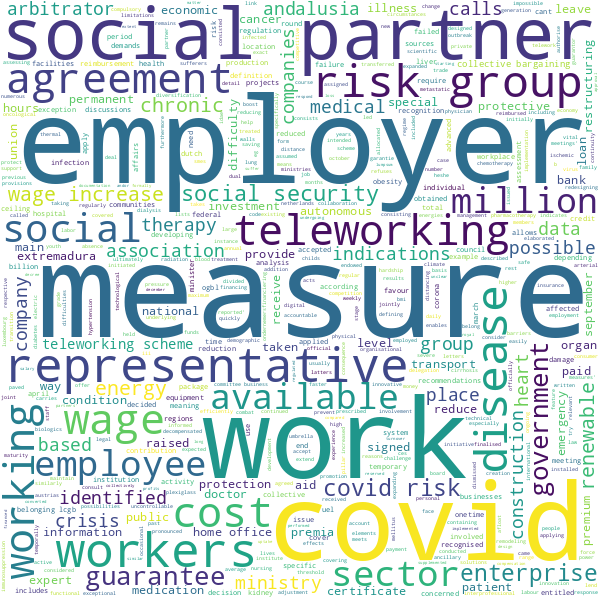

In [4]:
generate_wordcloud(str(words))

#### LDA model training

In [5]:
word_modeling = WordsModeling(data)
lda_representation = word_modeling.lda_model_training()
corpus_tf_idf = word_modeling.words_frequency()

[2021-05-17 17:34:39,401] {dictionary.py:200} INFO - adding document #0 to Dictionary(0 unique tokens: [])
[2021-05-17 17:34:39,610] {dictionary.py:205} INFO - built Dictionary(13339 unique tokens: ['', 'accept', 'accountable', 'agreement', 'annual']...) from 1288 documents (total 239493 corpus positions)
[2021-05-17 17:34:39,621] {utils.py:448} INFO - Dictionary lifecycle event {'msg': "built Dictionary(13339 unique tokens: ['', 'accept', 'accountable', 'agreement', 'annual']...) from 1288 documents (total 239493 corpus positions)", 'datetime': '2021-05-17T17:34:39.611620', 'gensim': '4.0.1', 'python': '3.8.5 (default, Jan 27 2021, 15:41:15) \n[GCC 9.3.0]', 'platform': 'Linux-5.8.0-53-generic-x86_64-with-glibc2.29', 'event': 'created'}
[2021-05-17 17:34:39,828] {ldamodel.py:567} INFO - using symmetric alpha at 0.1
[2021-05-17 17:34:39,829] {ldamodel.py:567} INFO - using symmetric eta at 0.1
[2021-05-17 17:34:39,831] {ldamodel.py:484} INFO - using serial LDA version on this node
[2021-

#### Format topic sentence

In [6]:
topic_information = TopicInformation(lda_representation, data)
topic_sentence_keywords = topic_information.format_topic_sentences()
topic_sentence_keywords

[2021-05-17 17:35:19,822] {dictionary.py:200} INFO - adding document #0 to Dictionary(0 unique tokens: [])
[2021-05-17 17:35:20,029] {dictionary.py:205} INFO - built Dictionary(13339 unique tokens: ['', 'accept', 'accountable', 'agreement', 'annual']...) from 1288 documents (total 239493 corpus positions)
[2021-05-17 17:35:20,030] {utils.py:448} INFO - Dictionary lifecycle event {'msg': "built Dictionary(13339 unique tokens: ['', 'accept', 'accountable', 'agreement', 'annual']...) from 1288 documents (total 239493 corpus positions)", 'datetime': '2021-05-17T17:35:20.030120', 'gensim': '4.0.1', 'python': '3.8.5 (default, Jan 27 2021, 15:41:15) \n[GCC 9.3.0]', 'platform': 'Linux-5.8.0-53-generic-x86_64-with-glibc2.29', 'event': 'created'}


,Dominant_Topic,Perc_Contribution,Topic_Keywords,descriptive_data
0,9.0,0.7029,"social, company, workers, covid, employees, wo...","[agreement, teleworking, regime, covid, crisis..."
1,5.0,0.5572,"health, care, leave, covid, work, medical, hom...","[special, protection, covid, risk, groups, wor..."
2,3.0,0.9904,"government, measures, sector, support, million...","[funds, innovative, renewable, projects, andal..."
3,4.0,0.7233,"support, measure, scheme, covid, million, comp...","[waiver, advance, payments, social, health, in..."
4,6.0,0.8550,"loans, loan, companies, enterprises, credit, s...","[financial, shield, small, mediumsized, enterp..."
...,...,...,...,...
1283,8.0,0.4603,"social, benefit, unemployment, law, employment...","[automatic, extension, unemployment, benefits,..."
1284,3.0,0.7526,"government, measures, sector, support, million...","[extra, subsidies, institutions, cultural, inf..."
1285,6.0,0.3386,"loans, loan, companies, enterprises, credit, s...","[expanding, business, loan, guarantee, scheme,..."
1286,4.0,0.4726,"support, measure, scheme, covid, million, comp...","[collective, working, time, reduction, compani..."


In [7]:
df_dominant_topic = topic_information.sort_dominant_topic()
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,9.0,0.7028,"social, company, workers, covid, employees, wo...","[agreement, teleworking, regime, covid, crisis..."
1,1,5.0,0.5572,"health, care, leave, covid, work, medical, hom...","[special, protection, covid, risk, groups, wor..."
2,2,3.0,0.9904,"government, measures, sector, support, million...","[funds, innovative, renewable, projects, andal..."
3,3,4.0,0.7233,"support, measure, scheme, covid, million, comp...","[waiver, advance, payments, social, health, in..."
4,4,6.0,0.8551,"loans, loan, companies, enterprises, credit, s...","[financial, shield, small, mediumsized, enterp..."
...,...,...,...,...,...
1283,1283,8.0,0.4603,"social, benefit, unemployment, law, employment...","[automatic, extension, unemployment, benefits,..."
1284,1284,3.0,0.7526,"government, measures, sector, support, million...","[extra, subsidies, institutions, cultural, inf..."
1285,1285,6.0,0.3386,"loans, loan, companies, enterprises, credit, s...","[expanding, business, loan, guarantee, scheme,..."
1286,1286,4.0,0.4726,"support, measure, scheme, covid, million, comp...","[collective, working, time, reduction, compani..."


#### The most representative sentence for each topic

In [8]:
most_representative_sentences = topic_information.select_most_illustrative_sentence()
most_representative_sentences

,Document_No,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,658,0.0,0.4288,"protocol, masks, production, jobseekers, sites...","[good, practice, snowblowers, blow, disinfecta..."
1,11,1.0,0.9267,"employees, agreement, working, employers, hour...","[frame, agreement, working, time, regulations,..."
2,8,2.0,0.7096,"food, retail, service, chamber, services, sale...","[online, platform, quarantine, internet, intro..."
3,21,3.0,0.9958,"government, measures, sector, support, million...","[support, professionals, creative, industries,..."
4,16,4.0,0.9955,"support, measure, scheme, covid, million, comp...","[state, sponsorship, scheme, businesses, selfe..."
5,39,5.0,0.8053,"health, care, leave, covid, work, medical, hom...","[temporary, parental, allowance, covid, order,..."
6,15,6.0,0.8653,"loans, loan, companies, enterprises, credit, s...","[special, anticrisis, financing, natioanl, cre..."
7,6,7.0,0.6915,"tax, income, taxpayers, holiday, taxes, admini...","[writing, renters, income, tax, liability, sec..."
8,44,8.0,0.9834,"social, benefit, unemployment, law, employment...","[lump, sum, pensioners, disabled, people, law,..."
9,9,9.0,0.9330,"social, company, workers, covid, employees, wo...","[specific, covid, related, hr, measures, compa..."


#### Analyzing LDA model results

In [9]:
lda_model_visualize = topic_information.visualize_lda_model()
lda_model_visualize

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.182317 -0.109409       1        1  24.674690
9      0.117386  0.054806       2        1  23.068786
3      0.095396 -0.204844       3        1  13.045582
8      0.147387  0.090090       4        1  11.565360
6      0.048038 -0.173002       5        1   7.979382
1      0.093217  0.244960       6        1   7.622510
5      0.036339  0.128745       7        1   5.773510
2     -0.158153 -0.066556       8        1   4.002026
7     -0.274083  0.013370       9        1   1.372096
0     -0.287843  0.021841      10        1   0.896057, topic_info=            Term         Freq        Total Category  logprob  loglift
36     employees  1884.000000  1884.000000  Default  30.0000  30.0000
535          tax   487.000000   487.000000  Default  29.0000  29.0000
3      agreement   868.000000   868.000000  Default  28.0000  28.0000
189       health   946.000000   946.000000  Default  27.0000  27.0000
101      working  1030.000000  1030.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
7372        crew    13.298319    29.310014  Topic10  -5.0837   3.9246
3522       malta    20.670718   124.563563  Topic10  -4.6426   2.9188
2139    products    21.388996   141.186970  Topic10  -4.6085   2.8277
1459  compliance    10.021070    34.502135  Topic10  -5.3667   3.4786
769      reached     9.381099    70.704661  Topic10  -5.4327   2.6951

[634 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
104       7  0.971468      absence
2982      4  0.982698  accordingly
380       1  0.101695          act
380       4  0.349413          act
380       5  0.325945          act
...     ...       ...          ...
103       7  0.061413        years
103       8  0.013958        years
540       5  0.974788            z
1110      4  0.973558      ziuzeop
6654      4  0.959969     ziuzeopa

[1226 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 10, 4, 9, 7, 2, 6, 3, 8, 1])

#### Frequency Distribution of Word Counts in Documents

In [92]:
def plotly_bar_chart_graphic(chart_title: str, x_axis: pd.DataFrame, y_axis,
                             x_axis_title: str, y_axis_title: str):
    """
    assuming we want to represent in graphic chart specific data
    :chart_title: graphic title
    :x_axis: our DataFrame we will use as x axis
    :y_axis: our DataFrame we will use as y axis
    :x_axis_title: the title for our x axis
    :y_axis_title: the title for our y axis
    :return: bar chart graphic
    """
    layout = {"title": chart_title,
              "xaxis": {"title": x_axis_title},
              "yaxis": {"title": y_axis_title}}

    trace = go.Bar(x = x_axis,
                   y = y_axis)

    figure = go.Figure(data=trace, layout=layout)
    iplot(figure)

In [94]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

plotly_bar_chart_graphic("Frequency Distribution of Word Counts in Documents",
                         df_dominant_topic['Document_No'], doc_lens,
                         "Number of documents", "Word count")